In [1]:
import colorsys
import cv2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

import pandas as pd
from pandas import DataFrame, Series
from pandas.io.json import json_normalize 

from urllib.request import urlopen
import requests

from time import time
import datetime

'''
get color data for memes analysis
'''

'\nget color data for memes analysis\n'

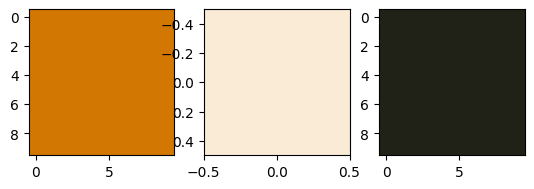

In [22]:
# functions to convert an rgb color to a range in hsv that can be used to mask the images
def rgb_hsv_converter(rgb):
    (r,g,b) = rgb_normalizer(rgb)
    hsv = colorsys.rgb_to_hsv(r,g,b)
    (h,s,v) = hsv_normalizer(hsv)
    upper_band = [h+10, s+40, v+40] 
    lower_band = [h-10, s-40, v-40]                     
    return {
        'upper_band': upper_band,
        'lower_band': lower_band
    }

def rgb_normalizer(rgb):
    (r,g,b) = rgb
    return (r/255, g/255, b/255)

def hsv_normalizer(hsv):
    (h,s,v) = hsv
    return (h*360, s*255, v*255)

# display range of colors to check functions
rgb = (250,235,215) # green: (128, 255, 0)
dict_colors = rgb_hsv_converter(rgb)

color_2 = tuple(dict_colors['lower_band'])
color_1 = tuple(dict_colors['upper_band'])

do_square = np.full((10, 10, 3), color_2, dtype=np.uint8) / 255.0
lo_square = np.full((10, 10, 3), color_1, dtype=np.uint8) / 255.0

plt.subplot(1, 3, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 3, 2)
plt.imshow([[rgb]]) 
plt.subplot(1, 3, 3)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

In [99]:
# artur's colors

colors = {
    'white': [np.array([0, 0, 230],np.uint8), np.array([179, 25, 255],np.uint8)],
    'gray': [np.array([0, 0, 60],np.uint8), np.array([179, 25, 230],np.uint8)],
    'black': [np.array([0, 0, 0],np.uint8), np.array([179, 255, 60],np.uint8)],
    'red': [np.array([0, 150, 65],np.uint8), np.array([10, 255, 255],np.uint8)],
    'blue': [np.array([175, 150, 65],np.uint8), np.array([179, 255, 255],np.uint8)],
    'orange': [np.array([11, 100, 65],np.uint8), np.array([20, 255, 255],np.uint8)],
    'yellow': [np.array([21, 100, 65],np.uint8), np.array([36, 255, 255],np.uint8)],
    'green': [np.array([37, 100, 65],np.uint8), np.array([79, 255, 255],np.uint8)],
    'maroon': [np.array([217,167,47],np.uint8), np.array([237,247,127],np.uint8)],
    'skyblue': [np.array([91, 100, 65],np.uint8), np.array([134, 255, 255],np.uint8)],
    'brown': [np.array([16, 58, 56],np.uint8), np.array([36, 100, 100],np.uint8)],
    'pink': [np.array([215,110,150],np.uint8), np.array([255,130,200],np.uint8)]
}

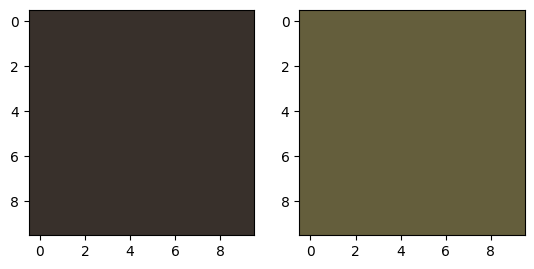

In [101]:
# visualize colors

color_1 = colors['brown'][0]
color_2 = colors['brown'][1]

do_square = np.full((10, 10, 3), color_1, dtype=np.uint8) / 255.0
lo_square = np.full((10, 10, 3), color_2, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))

/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_46551/4049035495.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv ('./Data/Memes/memesfinal.csv')


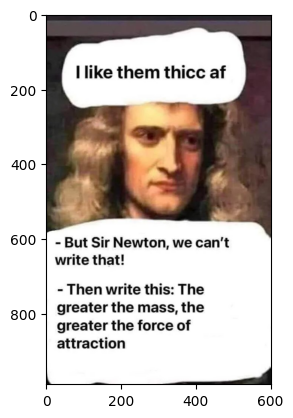

this meme has 0.9292399421927391 per pixel of ~ 'brown' ~


In [102]:
# check how these colors work ask masks for our memes

# import data
df = pd.read_csv ('./Data/Memes/memesfinal.csv')

# get an image from media attr to analyze
def url_to_image(url):
    try: 
        request = requests.get(url)
        get_image = urlopen(url)
        arr_image = np.asarray(bytearray(get_image.read()), dtype="uint8") 
        image = cv2.imdecode(arr_image, cv2.IMREAD_COLOR)
    except:
        image = np.array([None,None,None])   
    return image

# function gets data about the amount of one color in image, sum of pixel values for that color over total # of pixels
def getColorMask(meme,color_1,color_2):
    hsv_meme1 = cv2.cvtColor(meme, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv_meme1, color_1, color_2)
    result = cv2.bitwise_and(meme, meme, mask=mask)
    return (np.sum(mask)/(meme.shape[0]*meme.shape[1]))

# check
row = df.iloc[10]; test_url = row['url']
im = url_to_image(test_url)
meme1 = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(meme1)
plt.show()

print("this meme has", getColorMask(meme1,color_1,color_2), "per pixel of ~ 'brown' ~")


In [ ]:
# loop thru memes and save data

t0 = time()
for i in range(0,len(df)): 
    try:
        url = df.iloc[i]['media']
        im = url_to_image(url)
        meme = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        counter = 0
        for key in colr_dict:
            dict_colors = rgb_hsv_converter(rgb_colors[counter])
            color_2 = tuple(dict_colors['lower_band'])
            color_1 = tuple(dict_colors['upper_band'])
            colr_dict[key].append(getColorMask(meme,color_2,color_1))
            counter += 1
    except:
        for key in colr_dict:
            colr_dict[key].append(None)
        print("bah")
t1 = time()   
print('seconds to run: %f' %(t1-t0))
colr_dict
